In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from numpy.random import randint

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from PIL import Image
import tensorflow as tf
from keras.preprocessing.image import load_img

In [4]:
# pasta de imagens a serem analisadas
base_dir = "pics"

image_paths = []
ages = []
genders = []

gender_dict = {0: 'Male', 1: 'Female'}

# quantas imagens foram coletadas
qnt_img = 0
for i in os.listdir(base_dir):
    img_path = os.path.join(base_dir, i)
    aux = i.split('_')
    age = int(aux[0])
    gender = int(aux[1])
    image_paths.append(img_path)
    ages.append(age)
    genders.append(gender)
    qnt_img += 1

# cria dataframe com as informações das imagens
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, ages, genders
df

,image,age,gender
0,pics/20_1_rachel.jpg,20,1
1,pics/21_0_biliOculos.jpg,21,0
2,pics/2_1_euNatal.jpg,2,1
3,pics/60_1_IA.png,60,1
4,pics/21_1_mari.jpg,21,1
5,pics/21_1_raquelzinha3.jpg,21,1
6,pics/30_1_herica.jpg,30,1
7,pics/2_0_joao.jpg,2,0
8,pics/25_1_IA.png,25,1
9,pics/47_1_herica.jpg,47,1


Age:  38
Gender:  Male


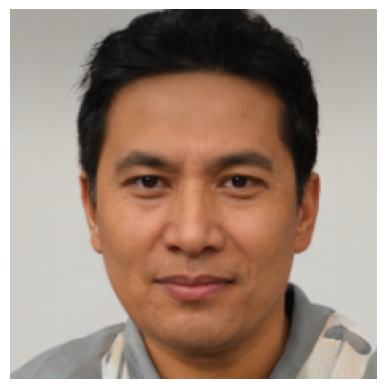

In [4]:
# exemplo de imagem no df
# index = random.randint(0, qnt_img)
index = 11
example_img = Image.open(df['image'][index])
plt.axis('off')
plt.imshow(example_img)
print('Age: ', df['age'][index])
print('Gender: ', gender_dict[df['gender'][index]])


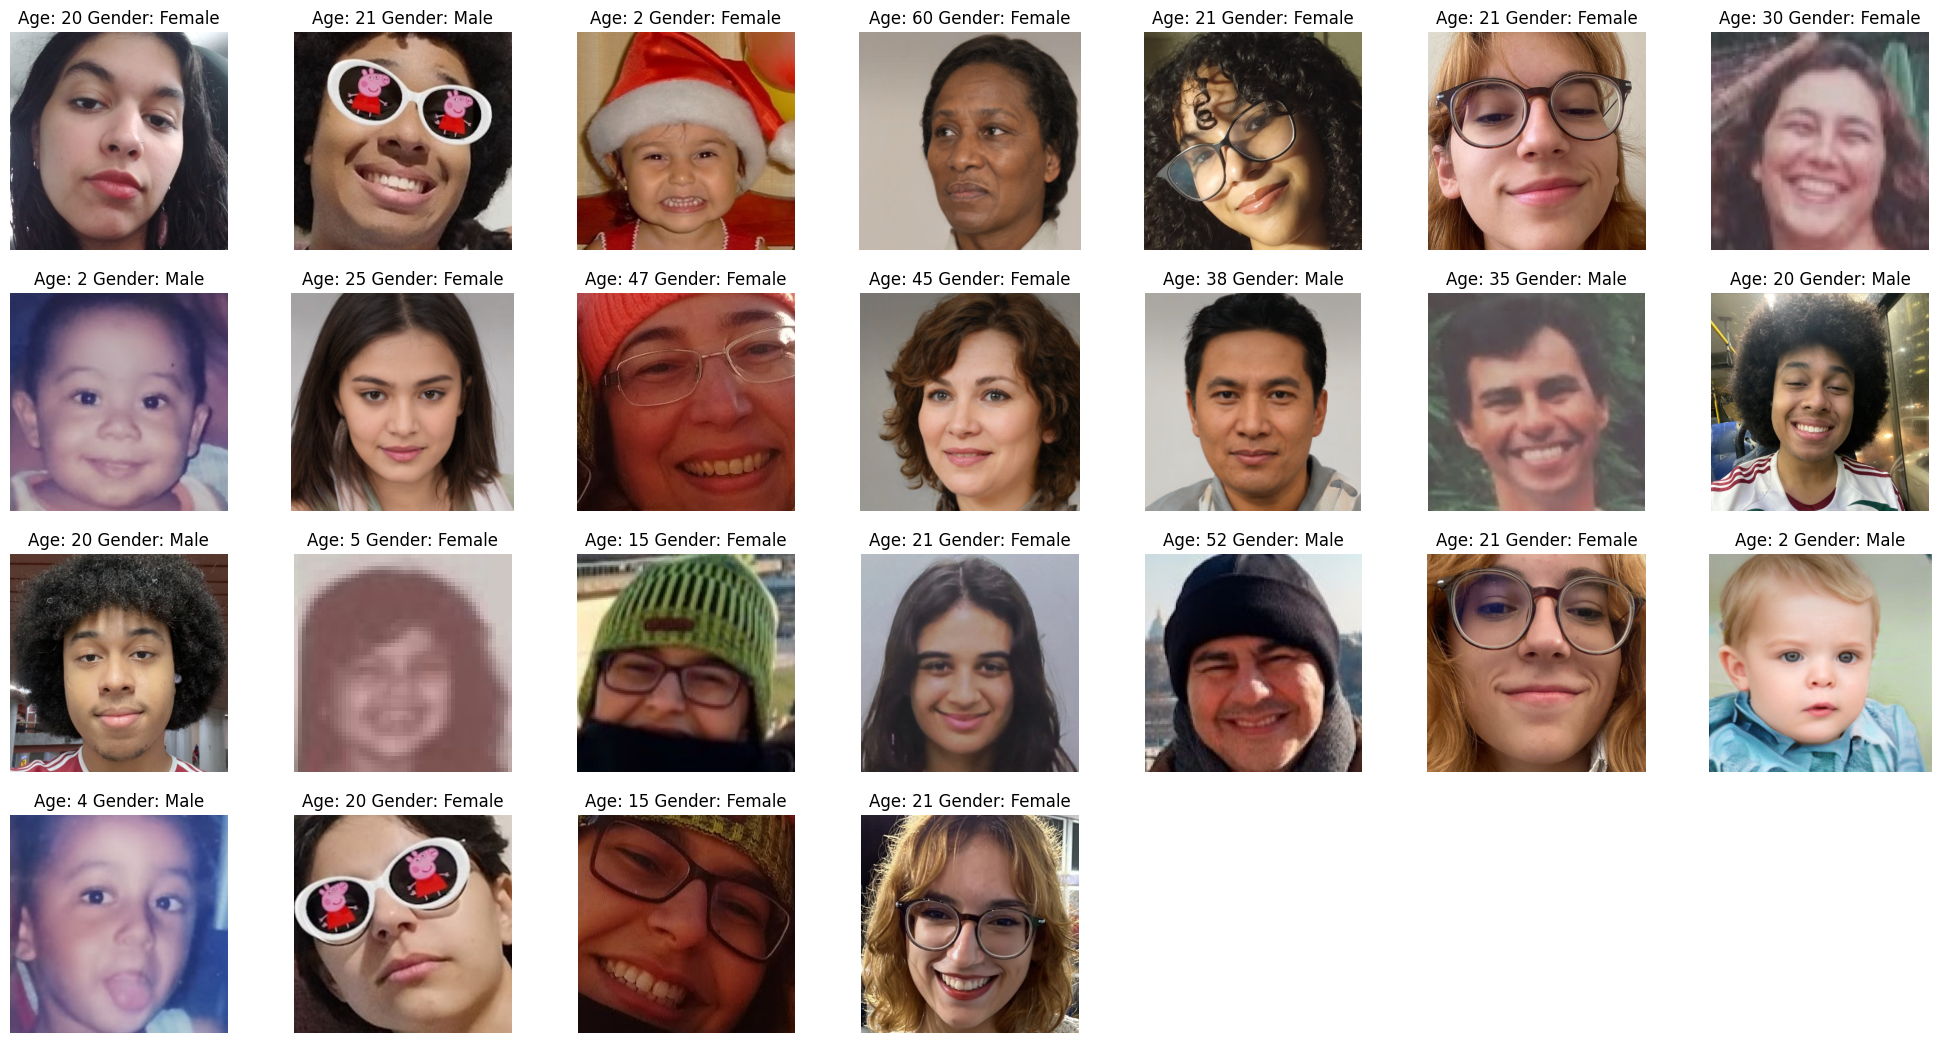

In [8]:
# alguns exemplos de amostras
# mostra 'qnt_img' amostras aleatórias, com sua respectiva idade e gênero

plt.figure(figsize=(25, 13))
imgs = df.iloc[0:qnt_img]

for index, file, age, gender in imgs.itertuples():
    plt.subplot(4, 7, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

In [6]:
# função para extrair as features das imagens
# e redimensionar para 128x128 em escala de cinza

def extract_features(images):
    features = []
    for image in images:
        # transforma em escala de cinza
        # basta ignorar se quiser imagens coloridas
        img = load_img(image, grayscale=True) 
        img = img.resize((128, 128)) # redimensiona
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # basta ignorar se usar imagens coloridas
    features = features.reshape(len(features), 128, 128, 1)
    return features

array_BW_images = extract_features(df['image'])

array_BW_images = array_BW_images / 255.0 # normaliza os pixels para valores entre 0 e 1

In [7]:
# plt.imshow(array_BW_images[index].reshape(128, 128), cmap='gray');

In [8]:
# convertendo genero e idade para array
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

# determinando o shape das imagens - array_BW_images.shape
input_shape = (128, 128, 1)

In [9]:
loaded_model = tf.keras.models.load_model('modelo1.h5')

2023-12-23 02:01:41.498156: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-23 02:01:41.498500: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Original Gender: Male  | Original Age: 20
Predicted Gender: Male  | Predicted Age: 47
Gender predicted correctly and age outside of expected interval!


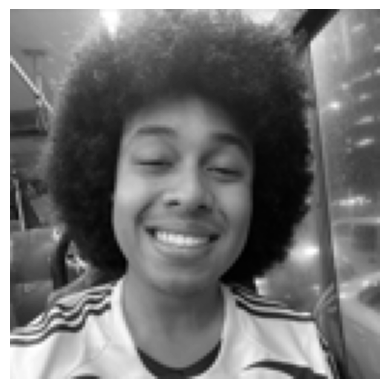

In [18]:
image_index = randint(0, qnt_img - 1)
# image_index = 11

print("Original Gender:", gender_dict[y_gender[image_index]], " | Original Age:", y_age[image_index])

margin = 5

# predição a partir do modelo
pred = loaded_model.predict(array_BW_images[image_index].reshape(1, 128, 128, 1), verbose = 0)
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, " | Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(array_BW_images[image_index].reshape(128, 128), cmap='gray');

if gender_dict[y_gender[image_index]] == pred_gender:
    print("Gender predicted correctly", end=' ')
else:
    print("Gender not predicted correctly", end=' ')

age_interval = [pred_age-5, pred_age+5]
if y_age[image_index] in range(age_interval[0], age_interval[1]):
    print("and age within expected interval!")
else:
    print("and age outside of expected interval!")

In [28]:
# verifica o resultado de n imagens aleatórias
def verify(num_imgs, img_array, age_margin=5):
    X_copy = img_array.copy()
    cor_gender = 0
    cor_age = 0
    indexes = np.random.choice(np.arange(0, num_imgs), num_imgs, replace=False)
    print(indexes)
    for index in indexes:
        pred = loaded_model.predict(X_copy[index].reshape(1, 128, 128, 1), verbose=0)
        pred_gender = gender_dict[round(pred[0][0][0])]
        pred_age = round(pred[1][0][0])

        # verifica se o gênero foi previsto corretamente
        if pred_gender == gender_dict[y_gender[index]]:
            cor_gender += 1
        
        # verifica se a idade foi prevista corretamente
        if y_age[index] in range(pred_age-age_margin, pred_age+age_margin):
            cor_age += 1
    # print(cor_age, cor_gender)
    return cor_age, cor_gender

cor_age, cor_gender = verify(qnt_img, array_BW_images)

[20  1 23 14  3 11 22 24  0  7  6 13 10 18 19  5  2 16 21 15  4 12  8  9
 17]


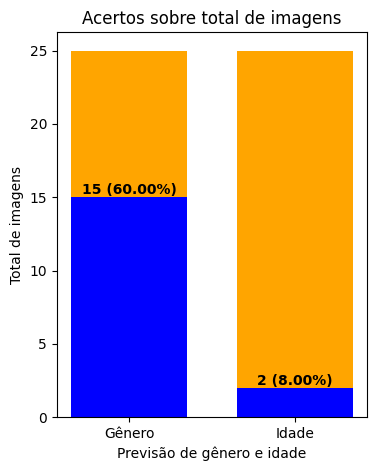

In [29]:
# grafico da quantidade de acertos de idade em relação ao total de imagens
x_axis = ["Gênero", "Idade"]
y1 = [qnt_img, qnt_img]
y2 = [cor_gender, cor_age]

fig, ax = plt.subplots(figsize=(4, 5))

# barras
bar_width = 0.7
bar1 = ax.bar(x_axis, y1, bar_width, color='orange', label='Total de imagens')
bar2 = ax.bar(x_axis, y2, bar_width, color='blue', label='Acertos')

# mostrando as porcentagens nas barras
for rect in bar1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, '', ha='center', va='bottom')

for rect in bar2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{height} ({height / qnt_img * 100:.2f}%)', ha='center', va='bottom', fontdict={'weight': 'bold'})

plt.ylabel('Total de imagens')
plt.xlabel('Previsão de gênero e idade')
plt.title('Acertos sobre total de imagens')
plt.show()
